In [235]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ta
from ta.momentum import RSIIndicator
from ta.trend import MACD
import mplfinance as mpf

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [236]:
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
data.head()

print(data.index)

[*********************100%***********************]  1 of 1 completed

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)


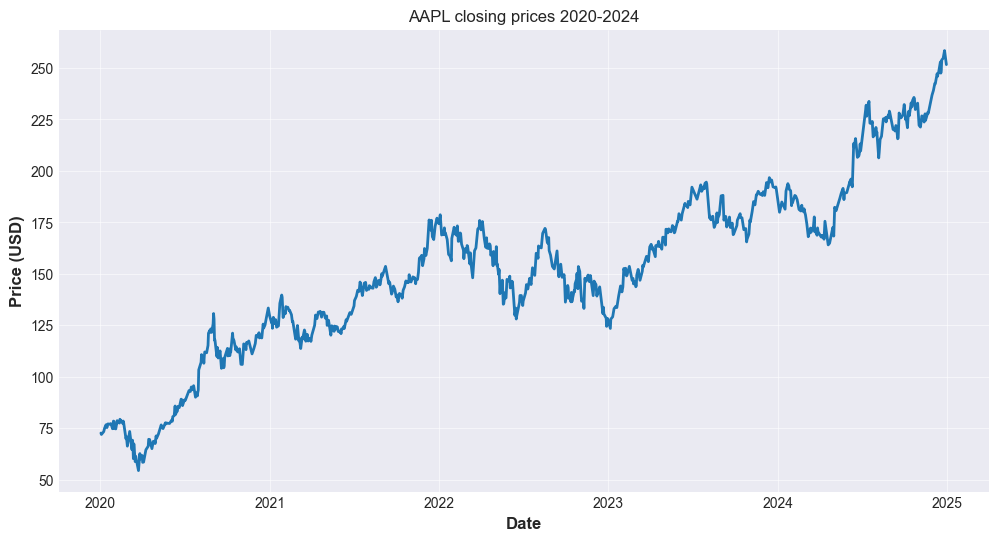

In [237]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label="Closing price")
plt.title("AAPL closing prices 2020-2024")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

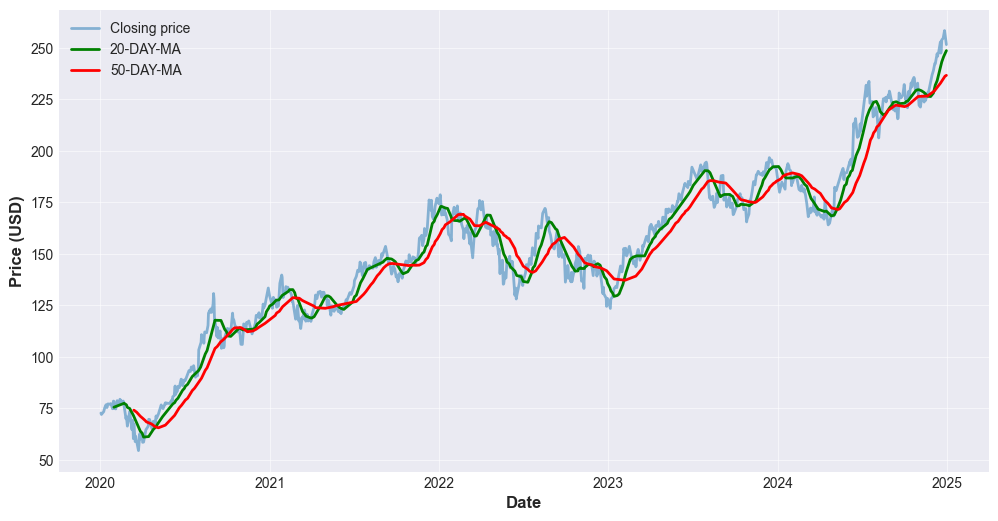

In [238]:
data['MA20'] = data['Close'].rolling(20).mean()
data['MA50'] = data['Close'].rolling(50).mean()
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], alpha=0.5, label="Closing price")
plt.plot(data.index, data['MA20'], label="20-DAY-MA", color="green")
plt.plot(data.index, data['MA50'], label="50-DAY-MA", color="red")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [239]:
data['STD20'] = data['Close'].rolling(20).std()

data['UpperBand'] = data['MA20'] + (2 * data['STD20'])
data['LowerBand'] = data['MA20'] - (2 * data['STD20'])

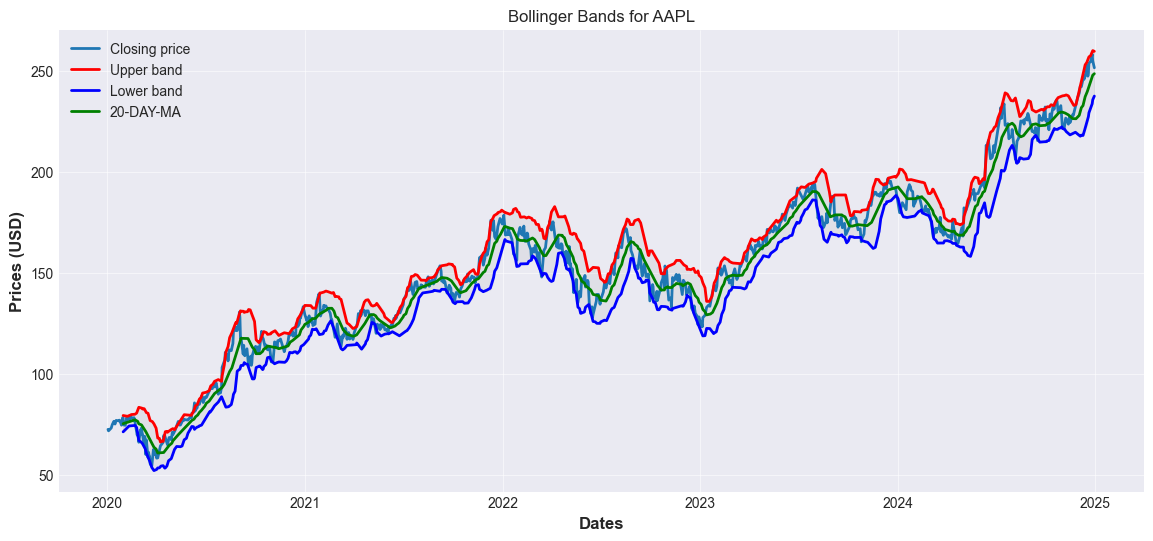

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
                 ...    
2024-12-23    244.437349
2024-12-24    245.700803
2024-12-26    246.895920
2024-12-27    247.926434
2024-12-30    248.668145
Name: MA20, Length: 1257, dtype: float64


In [240]:
plt.figure(figsize=(14,6))
plt.plot(data.index, data['Close'], label="Closing price")
plt.plot(data.index, data['UpperBand'], label="Upper band",color="red")
plt.plot(data.index, data['LowerBand'], label="Lower band",color="blue")
plt.plot(data.index, data['MA20'], label="20-DAY-MA",color="green")
plt.fill_between(data.index, data['UpperBand'], data['LowerBand'], color="gray", alpha=0.1)
plt.title("Bollinger Bands for AAPL")
plt.xlabel("Dates")
plt.ylabel("Prices (USD)")
plt.legend()
plt.show()
print(data['MA20'])

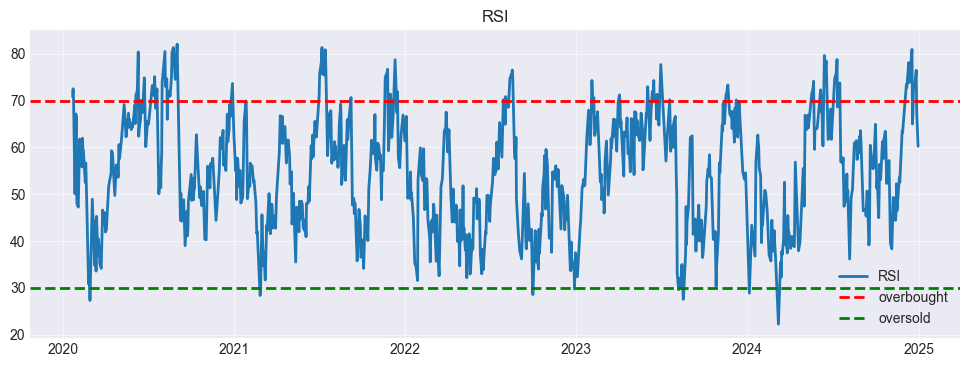

In [241]:
rsi = RSIIndicator(close=data['Close'].squeeze(), window=14)
data['RSI'] = rsi.rsi()

plt.figure(figsize=(12,4))
plt.plot(data.index, data['RSI'], label='RSI')
plt.axhline(70, color="red", linestyle="--", label="overbought")
plt.axhline(30, color="green", linestyle="--", label="oversold")
plt.legend()
plt.grid(True)
plt.title("RSI")
plt.show()

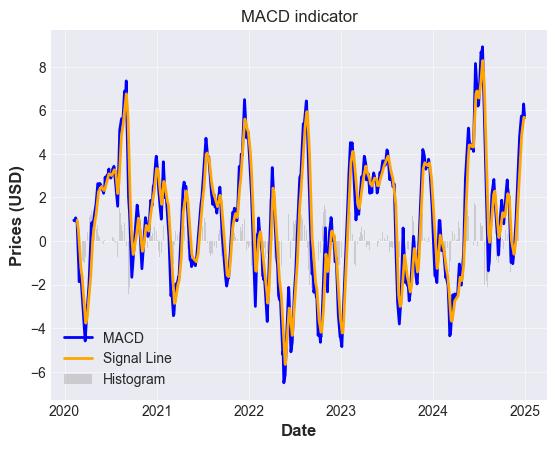

In [242]:
macd = MACD(close=data['Close'].squeeze(), window_slow=26, window_fast=12, window_sign=9)
data['MACD'] =  macd.macd()
data['MACD_Signal'] = macd.macd_signal()
data['MACD_Hist'] = macd.macd_diff()

plt.plot(data.index, data['MACD'], label="MACD", color="blue")
plt.plot(data.index, data['MACD_Signal'], label="Signal Line", color="orange")
plt.bar(data.index, data['MACD_Hist'], label="Histogram", color="gray", alpha=0.3)
plt.title("MACD indicator")
plt.xlabel("Date")
plt.ylabel("Prices (USD)")
plt.legend()
plt.grid(True)
plt.show()

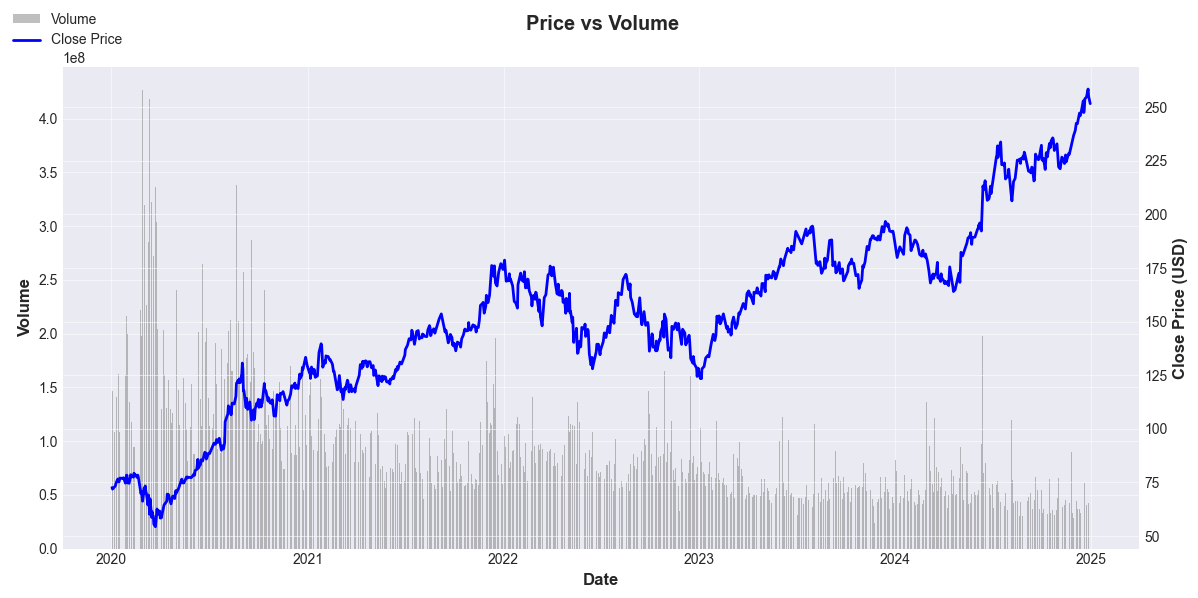

In [244]:
# Fix MultiIndex column references
data[('Volume', 'AAPL')] = pd.to_numeric(data[('Volume', 'AAPL')], errors='coerce')
data[('Close', 'AAPL')] = pd.to_numeric(data[('Close', 'AAPL')], errors='coerce')
data = data.dropna(subset=[('Volume', 'AAPL'), ('Close', 'AAPL')])

# Calculate volume moving average
data['Volume_MA20'] = data[('Volume', 'AAPL')].rolling(window=20).mean()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(data.index, data[('Volume', 'AAPL')], color='gray', alpha=0.5, label='Volume')
ax1.set_ylabel("Volume")
ax1.set_xlabel("Date")

ax2 = ax1.twinx()
ax2.plot(data.index, data[('Close', 'AAPL')], label='Close Price', color='blue')
ax2.set_ylabel("Close Price (USD)")

fig.suptitle("Price vs Volume")
fig.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\Kannan\AppData\Roaming\Python\Python313\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


Data types after cleanup:
Price
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


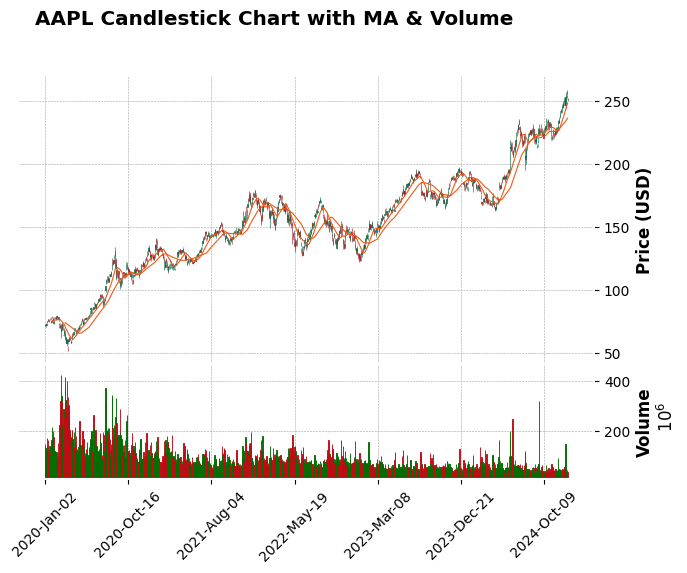

In [ ]:
# Download data
data2 = yf.download('AAPL', start='2020-01-01', end='2024-12-31')

# Check and flatten columns if MultiIndex (common issue)
if isinstance(data2.columns, pd.MultiIndex):
    data2.columns = data2.columns.get_level_values(0)

# Extract OHLCV and convert to float (safeguard)
ohlc = data2[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
ohlc = ohlc.apply(pd.to_numeric, errors='coerce')
ohlc = ohlc.dropna()

# Confirm no weird types
print("Data types after cleanup:")
print(ohlc.dtypes)

# Set index name
ohlc.index.name = 'Date'

# Plot
mpf.plot(
    ohlc,
    type='candle',
    style='charles',
    mav=(20, 50),
    volume=True,
    title='AAPL Candlestick Chart with MA & Volume',
    ylabel="Price (USD)",
    ylabel_lower='Volume'
)